## Credit Card Approval Prediction

### Applications:
- This project is predicting the approval of a credit card. And it will help the credit card issuers whether to approve a credit card or not.

### Problem Statement:
- The main aim of my project is to predict the credit card approval. For doing this I selected the dataset from UCI (https://archive.ics.uci.edu/ml/datasets/Credit+Approval). So my goal is to predict the credit card approvals. Here I am using classification models to find the accuracy of each model and select the best model with high accuracy to predict the approvals. Here the input parameters are training data that we took and the output will be whether to approve the credit card or not.

### Dataset Information:
- This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mixture of attributes – Categorical, integer and real valued attributes

- For the best result we will split the data into training set and testing set. On a whole we will assign 70% of the data to training set and 30% of the data to testing set.

### Attributes:
- A1: b, a.
- A2: continuous. A3: continuous. A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff. A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous. A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

### Solution Statement:
- Here, I am trying to predict the credit approval from the selected dataset for predicting the credit card approval we will use the different classification models. Then we will find the accuracy score for each model. I explore the dataset by using read_csv and for visualization which helps me to better understand the solution, I used matplotlib.pyplot.
- Here I will use the classification models like random forest, decision tree, svm, logistic regression, knn, naive bayes. After training the data we will test all the models with testing data. After that we will find out the accuracy score for all the models.
- Finally, I will declare the model with highest accuracy score as the best model for detecting the credit card approval.

### Benchmark Model:

- Benchmark model is a model which we will take as reference and achieve the best result than the benchmark model in our project we will take naive bayes as a benchmark model. Using naive bayes model we will achieve an accuracy of 62.74. Now we will try and achieve the better accuracy than the benchmark model.

### Evaluation Metrics:

- I want to use accuracy score as evaluation metric for prediction of credit approval. Here the dataset classes (+ and -) are closely balanced, so we can use accuracy as an evaluation metric. Here I am predicting the accuracy score for the selected models. Here we will select a model whose accuracy score is greater than all the other models and we treat it as the best.

In [52]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Read the dataset
df=pd.read_csv("C:/Users/lenovo/Desktop/summer internship/Credit card/CC_data.csv")
df.head(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.500,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120,0,+
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360,0,+
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164,31285,+
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80,1349,+
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180,314,+
9,b,42.5,4.915,y,p,w,v,3.165,t,f,0,t,g,52,1442,+


In [54]:
# read shape 
df.shape

(690, 16)

In [55]:
# read columns name
df.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [56]:
# read information use of info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 54.0+ KB


In [57]:
# read the descriptin pf numiracal data
df.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [58]:
# read description of categorical data
df.describe(include=['object'])

,Male,Age,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,ZipCode,Approved
count,690,690,690,690,690,690,690,690,690,690,690,690
unique,3,350,4,4,15,10,2,2,2,3,171,2
top,b,?,u,g,c,v,t,f,f,g,0,-
freq,468,12,519,519,137,399,361,395,374,625,132,383


In [59]:
# count the unique value
df.nunique()

Male                3
Age               350
Debt              215
Married             4
BankCustomer        4
EducationLevel     15
Ethnicity          10
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           171
Income            240
Approved            2
dtype: int64

In [60]:
# read correlation of numiracal data
df.corr()

,Debt,YearsEmployed,CreditScore,Income
Debt,1.000000,0.298902,0.271207,0.123121
YearsEmployed,0.298902,1.000000,0.322330,0.051345
CreditScore,0.271207,0.322330,1.000000,0.063692
Income,0.123121,0.051345,0.063692,1.000000


In [61]:
# count data of target data

df.Approved.value_counts()

-    383
+    307
Name: Approved, dtype: int64

In [62]:
# count data of male columns

df.Male.value_counts()

b    468
a    210
?     12
Name: Male, dtype: int64

### Data Cleaning

In [63]:
# Inspect missing values in the dataset
# Replace the '?'s with Na in age columns
df=df.replace('?',np.NaN)

In [64]:
df.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [65]:
df.isnull().values.sum()

67

In [66]:
for col in df.columns:
    if (df[col].dtypes) =='object':
        df[col].fillna(df[col].mode()[0],inplace=True)
       

In [67]:
print(df.isnull().sum()) 

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


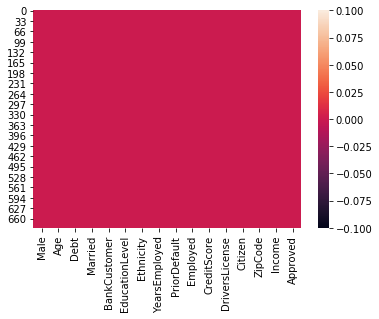

In [68]:
sns.heatmap(df.isnull())

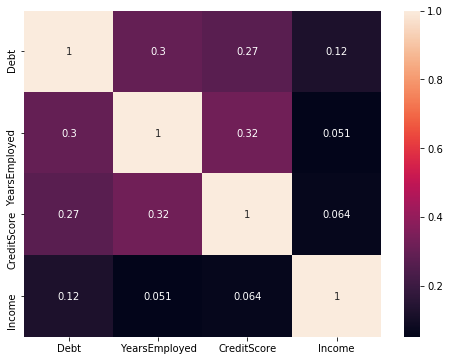

In [69]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

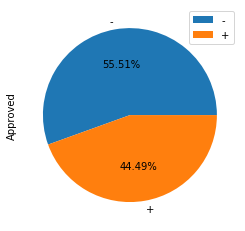

In [70]:
df.Approved.value_counts().plot.pie(autopct="%0.2f%%").legend()

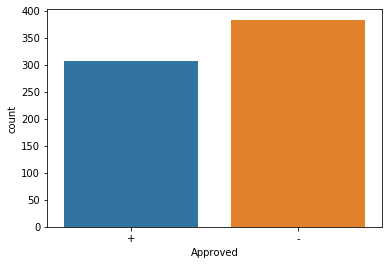

In [71]:
sns.countplot(x='Approved',data=df)

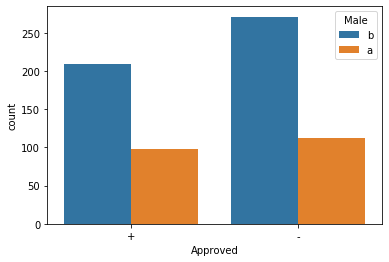

In [72]:
sns.countplot(x='Approved',hue='Male',data=df)

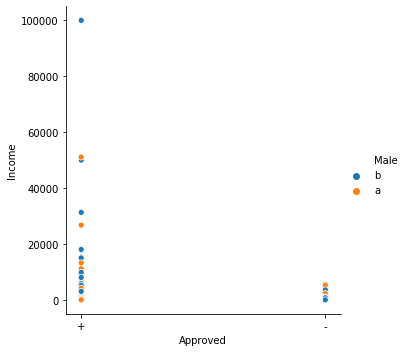

In [73]:

sns.relplot(x='Approved',y='Income',hue='Male',data=df)





### Preprocessing Data

In [74]:
# Convert the non-numeric data into numeric.
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for col in df.columns:
    
    if (df[col].dtypes) =='object':
        
        
        df[col]=lb.fit_transform(df[col])
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    int32  
 1   Age             690 non-null    int32  
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int32  
 4   BankCustomer    690 non-null    int32  
 5   EducationLevel  690 non-null    int32  
 6   Ethnicity       690 non-null    int32  
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int32  
 9   Employed        690 non-null    int32  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int32  
 12  Citizen         690 non-null    int32  
 13  ZipCode         690 non-null    int32  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int32  
dtypes: float64(2), int32(12), int64(2)
memory usage: 54.0 KB


In [75]:
df.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,42,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,118,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,74,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,1,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,8,0,0


In [76]:
# drop the unnecessary columns DriversLicense and ZipCode
# and also Drop the Approved columns for creating input

new_df=df.drop(['DriversLicense','ZipCode'],axis=1)

# Drop Approved for input
X=new_df.drop(['Approved'],axis=1) # Input

# target columns

y= new_df.Approved  # output

In [77]:
# Splitting the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(483, 13)
(207, 13)
(483,)
(207,)


In [78]:
# import standard scaller
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

# fit the train data using standard scaler

scale_x_train=scale.fit_transform(X_train)
scale_x_test=scale.fit_transform(X_test)

## Apply the model

### Logistic Regression model

In [79]:
from sklearn.linear_model import LogisticRegression 
lr=LogisticRegression()

# fit the train data on model
lr.fit(scale_x_train,y_train)

LogisticRegression()

In [80]:
# pridict data on train data
y_pred=lr.predict(scale_x_train)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,

In [81]:
# check accuracy using metrics on train data

from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred,y_train))

0.8757763975155279


In [82]:
# predict test data
y_test_pred=lr.predict(scale_x_test)
y_test_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0])

In [83]:
# find accuracy on test data
print(accuracy_score(y_test_pred,y_test))

0.8115942028985508


### KNeighbors Classifier model

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn= KNeighborsClassifier()

# fit the data 
knn.fit(scale_x_train,y_train)

KNeighborsClassifier()

In [85]:
kn_y_pred=lr.predict(scale_x_train)
print(accuracy_score(kn_y_pred,y_pred))

1.0


In [86]:
kn_test_pred=lr.predict(scale_x_test)
accuracy_score(kn_test_pred,y_test)

0.8115942028985508

### Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(scale_x_train,y_train)

pred = rfc.predict(scale_x_train)
# accuracy for Train data
rfc_score = accuracy_score(pred, y_train)
rfc_score

1.0

In [88]:
# Accuracy for test data
test_pred = rfc.predict(scale_x_test)
accuracy_score(test_pred,y_test)

0.855072463768116

### Support vector maschine

In [89]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(scale_x_train, y_train)

pred = svc.predict(scale_x_train)

svc_score = accuracy_score(y_train, pred)
svc_score

0.8964803312629399

In [90]:
# Accuracy for test data
test_pred = svc.predict(scale_x_test)
accuracy_score(test_pred,y_test)

0.8309178743961353

### Decision Tree Classifier


In [91]:
from sklearn.tree import DecisionTreeClassifier
dt= DecisionTreeClassifier()
dt.fit(scale_x_train,y_train)

#fit train data on model
tree_pred=dt.predict(scale_x_train)

# accuracy for train data
tree_auc=accuracy_score(tree_pred,y_train)
tree_auc

1.0

In [92]:
# Accuracy on test data
tree_test_pred=dt.predict(scale_x_test)

accuracy_score(tree_test_pred,y_test)

0.7681159420289855

### Naive Bayes model

In [93]:
# apply the Naive Bayes Algorithm
# import BernNB
from sklearn.naive_bayes import BernoulliNB

# creating an object for BerNB
model_BernNB=BernoulliNB()

In [94]:
# Applying the algorithm to the data
# objectname.fit(input,output)
model_BernNB.fit(scale_x_train,y_train)

BernoulliNB()

In [95]:
y_train_pred=model_BernNB.predict(scale_x_train)

train_auc= accuracy_score(y_train_pred,y_train)
train_auc

0.8467908902691511

In [96]:
# Prediction on Test data
# syntax: objectname.predict(inputvalues)
y_test_pred=model_BernNB.predict(scale_x_test)

accuracy_score(y_test_pred,y_test)


0.8454106280193237

### Conclusion:
- we are find the best model RandomForest Classifier where i got train data accuracy on 1.0 and test data accuracy on 0.85.